# 시계열 데이터의 속성
- 종단면 시계열 데이터 - 시간의 흐름에 따라 한 변수에 대한 자료를 수집
- 횡단면 시계열 데이터 - 한 시점에 여러 변수에 대한 자료를 수집

# 시계열 데이터의 특징
- 계절성
- 추세성
- 반복성
- 순환성

## decompose
- 시계열 데이터의 특징을 없애고 정상성 시계열로 만드는 방법
- 가법모형과 승법모형이 있음
- 정상성(stationarity) 테스트
    - KPSS 검정 : p-value가 0.05 이상인 경우 정상시계열로 판단
    - ADF 검정 : p-value가 0.05 이하인 경우 정상시계열로 판단

# 데이터 가정에 따른 시계열 모형
- 시계열 자료는 추세변동, 계절변동 등 다양한 변동요인이 다중적으로 중첩되어 있음
    - 내포된 요인이 고정적 패턴을 보이는 경우(진폭 없음) : 요소 분해법(decompose)
    - 다양한 변동요인이 고정적 패턴을 보이지 않는 경우 : (지수)평활법

# 시계열 데이터 분석 시 사용하는 확률모형(Stochastic Model) 분석 4단계
1. 모형설정 : ACF, PACF 같은 지표와 auto.arima 같은 프로그램을 이용해서 시계열 자료에 적합한 모형 선택
2. 모수추정 : 설정한 모형에 따라 모수를 추정하고 적합성 검토
3. 분석 결과 검정 : 모형적합도에 따른 잔차의 정상성 및 분석 결과 검정 수행
4. 예측(forecasting) : 시계열 자료와 분석모형을 토대로 미래 값을 예측

# 시계열 종류에 따른 분석 모형
## 안정적 시계열 or 정상성 시계열(stationary)
- 자기회귀 모형(AutoRegressive, AR)
- 이동 평균 모형(Moving Average, MA)
- 자기회귀 이동 평균 모형(AutoRegressive Moving Average, ARMA)
## 불안정 시계열 or 비정상 시계열(non-stationary)
- 자기회귀 누적이동평균 모형(AutoRegressive Integrated Moving Average, ARIMA)

# 자기 상관 함수(Auto Correlation Function, ACF)
- 동일한 변수를 시점을 달리해서 관측했을 때 시점에 따라 다른 값 사이의 상호 연관관계를 나타내는 척도
- 연속적인 관측값 사이의 상호 연관관계

# 부분 자기 상관 함수(Partial Auto Correlation Function, PACF)
- 산정하고자 하는 연속적인 2개의 시계열 자료에서 상관계수를 구함.
- 산정하고자 하는 두 변수를 제외한 모든 변수의 영향을 제거한 상태에서 두 변수간에 존재하는 순수한 상관계수를 산정해 정상성 검정

In [6]:
#!pip install plotly

In [7]:
#!pip install chart-studio

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import os
import warnings
warnings.filterwarnings('ignore')
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [10]:
summary = pd.read_csv('./data/Summary.csv')
summary

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
operations = pd.read_csv('./data/operations.csv')
operations

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,178738,2/16/1945,CBI,USA,10 AF,89 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35815.0
178277,178739,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35020.0
178278,178740,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35022.0
178279,178741,2/16/1945,PTO,NEW ZEALAND,RNZAF,NO. 22 SQUADRON RNZAF,F4U,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8000.0,4.0,NaN,NaN,NaN


In [12]:
locations = pd.read_csv('./data/location.csv')
locations

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333
...,...,...,...,...,...,...,...,...
156,33109,EL AQUINA,TS,3651N,01015E,4,36.850000,10.016667
157,33121,EL DJEM,TS,3520N,01040E,9999,35.333333,10.066667
158,33003,SISI AHMED,TS,3712N,00950E,4,37.200000,9.083333
159,33307,ADANA,TU,3659N,03518E,20,36.983333,35.016667


In [13]:
aerial = operations.copy()
weather_station_location = locations.copy()
weather = summary.copy()

In [14]:
aerial.isna().sum()

Mission ID                                    0
Mission Date                                  0
Theater of Operations                      3158
Country                                   51787
Air Force                                 51837
Unit ID                                  127368
Aircraft Series                             116
Callsign                                 178260
Mission Type                             131095
Takeoff Base                             174898
Takeoff Location                         174943
Takeoff Latitude                         175300
Takeoff Longitude                        175301
Target ID                                 50875
Target Country                              599
Target City                                2263
Target Type                               31911
Target Industry                           51802
Target Priority                           43561
Target Latitude                            8716
Target Longitude                        

In [19]:
# country가 na값이 아닌 행만 추출
aerial = aerial[aerial['Country'].isna() == False]

In [21]:
# Target Longitude가 na값이 아닌 행만 추출
aerial = aerial[aerial['Target Longitude'].isna() == False]

In [22]:
# Takeoff Longitude가 na값이 아닌 행만 추출
aerial = aerial[aerial['Takeoff Longitude'].isna() == False]

In [23]:
aerial.columns

Index(['Mission ID', 'Mission Date', 'Theater of Operations', 'Country',
       'Air Force', 'Unit ID', 'Aircraft Series', 'Callsign', 'Mission Type',
       'Takeoff Base', 'Takeoff Location', 'Takeoff Latitude',
       'Takeoff Longitude', 'Target ID', 'Target Country', 'Target City',
       'Target Type', 'Target Industry', 'Target Priority', 'Target Latitude',
       'Target Longitude', 'Altitude (Hundreds of Feet)', 'Airborne Aircraft',
       'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
       'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
       'High Explosives', 'High Explosives Type',
       'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
       'Incendiary Devices', 'Incendiary Devices Type',
       'Incendiary Devices Weight (Pounds)',
       'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
       'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
       'Fragmentation Devices Weight (Tons)', 'To

In [24]:
aerial = aerial[['Mission Date', 'Theater of Operations', 'Country', 'Air Force', 'Aircraft Series', 'Callsign',
                 'Takeoff Base', 'Takeoff Location', 'Takeoff Latitude', 'Takeoff Longitude',
                'Target Country', 'Target City', 'Target Type', 'Target Industry', 'Target Priority', 'Target Latitude', 'Target Longitude']]
aerial

,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Callsign,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude
0,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SPADAFORA,NaN,NaN,NaN,38.22,15.37
2,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,COSENZA,NaN,NaN,NaN,39.27,16.25
3,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.43,15.90
8,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SCILLA,NaN,NaN,NaN,38.23,15.72
9,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,ARMAMENT AND ORDNANCE PLANTS,NaN,38.43,15.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178034,8/14/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,ORLANDO,NaN,NaN,NaN,38.15,14.73
178035,8/14/1943,MTO,GREAT BRITAIN,RAF,LIB,NaN,OUDNA,TUNISIA,36.649608,10.121936,GREECE,SAN GIOVANNI,NaN,NaN,NaN,38.22,15.22
178080,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SCILLA,NaN,NaN,NaN,38.23,15.72
178201,2/15/1945,MTO,GREAT BRITAIN,RAF,LIB,NaN,"""TORTORELLA, FOGGIA""",ITALY,4248.0,1355.000000,GREECE,ABBAZIA,NaN,NaN,NaN,45.32,14.28


In [25]:
weather_station_location.columns

Index(['WBAN', 'NAME', 'STATE/COUNTRY ID', 'LAT', 'LON', 'ELEV', 'Latitude',
       'Longitude'],
      dtype='object')

In [27]:
weather_station_location = weather_station_location.drop(['LAT', 'LON', 'ELEV'], axis = 1)
weather_station_location

,WBAN,NAME,STATE/COUNTRY ID,Latitude,Longitude
0,33013,AIN EL,AL,36.383333,6.650000
1,33031,LA SENIA,AL,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,36.716667,3.216667
3,33044,TELERGMA,AL,36.116667,6.416667
4,12001,TINDOUF,AL,27.683333,-8.083333
...,...,...,...,...,...
156,33109,EL AQUINA,TS,36.850000,10.016667
157,33121,EL DJEM,TS,35.333333,10.066667
158,33003,SISI AHMED,TS,37.200000,9.083333
159,33307,ADANA,TU,36.983333,35.016667


In [28]:
weather.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [29]:
weather = weather[['STA', 'Date', 'MeanTemp']]
weather

,STA,Date,MeanTemp
0,10001,1942-7-1,23.888889
1,10001,1942-7-2,25.555556
2,10001,1942-7-3,24.444444
3,10001,1942-7-4,24.444444
4,10001,1942-7-5,24.444444
...,...,...,...
119035,82506,1945-12-27,23.333333
119036,82506,1945-12-28,23.888889
119037,82506,1945-12-29,23.333333
119038,82506,1945-12-30,23.333333


- 어떤 국가가 공습을 많이 했는가?

In [30]:
aerial['Country'].value_counts()

Country
USA              1895
GREAT BRITAIN     931
NEW ZEALAND       102
SOUTH AFRICA       14
Name: count, dtype: int64

- 어떤 국가가 공습을 많이 당했나

In [31]:
aerial['Target Country'].value_counts()

Target Country
ITALY                         1114
BURMA                          335
LIBYA                          272
GREECE                         228
TUNISIA                        113
EGYPT                           80
JAPAN                           71
CHINA                           52
SICILY                          46
GERMANY                         42
SOLOMON ISLANDS                 37
CRETE                           30
BISMARK ARCHIPELAGO             29
INDONESIA                       28
ETHIOPIA                        27
ERITREA                         21
PANTELLARIA                     20
BALI                            19
PHILIPPINE ISLANDS              19
YUGOSLAVIA                      19
THAILAND OR SIAM                16
ROMANIA                         13
FRENCH INDO CHINA               10
AUSTRIA                          9
BULGARIA                         8
ANDAMAN ISLANDS                  8
HUNGARY                          7
SUDAN                            7
GILBE

- burma 근처에 있는 BINDUKURI 관측소의 온도만 추출

In [34]:
weather_station_location.head(2)

,WBAN,NAME,STATE/COUNTRY ID,Latitude,Longitude
0,33013,AIN EL,AL,36.383333,6.650000
1,33031,LA SENIA,AL,35.616667,0.583333


In [39]:
weather_station_id = weather_station_location[weather_station_location['NAME'] == "BINDUKURI"]['WBAN']

In [40]:
weather_bin = weather[weather['STA'] == weather_station_id.values[0]]

In [41]:
weather_bin

,STA,Date,MeanTemp
78252,32907,1943-5-11,28.888889
78253,32907,1943-5-12,25.555556
78254,32907,1943-5-13,24.444444
78255,32907,1943-5-14,23.888889
78256,32907,1943-5-15,27.777778
...,...,...,...
78998,32907,1945-5-27,23.333333
78999,32907,1945-5-28,25.555556
79000,32907,1945-5-29,24.444444
79001,32907,1945-5-30,25.555556


In [43]:
weather_bin['Date'] = pd.to_datetime(weather_bin['Date'])
weather_bin['Date'].dtypes

dtype('<M8[ns]')

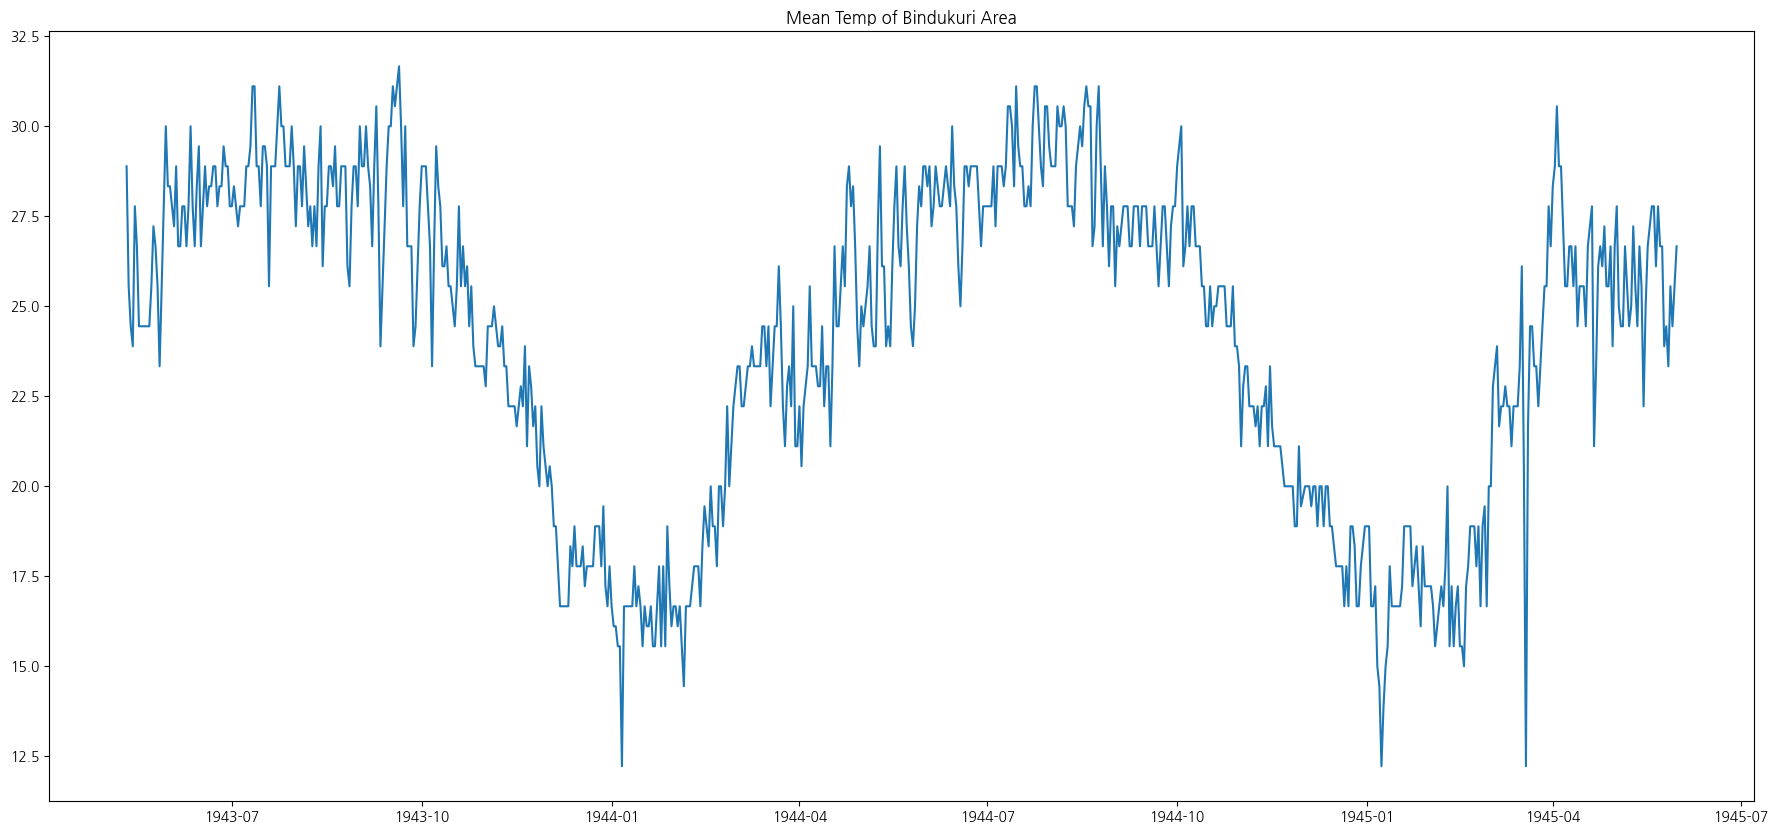

In [45]:
plt.figure(figsize = (22, 10))
plt.plot(weather_bin['Date'], weather_bin['MeanTemp'])
plt.title('Mean Temp of Bindukuri Area')
plt.show()

In [49]:
operations[['month', 'day', 'year']] = operations['Mission Date'].str.split('/', n = 2, expand = True)
operations

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID,month,day,year
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,8,15,1943
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,9366.0,8,15,1943
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,9.0,NaN,NaN,NaN,8,15,1943
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,7.5,NaN,NaN,NaN,8,15,1943
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,8.0,NaN,NaN,22585.0,8,15,1943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,178738,2/16/1945,CBI,USA,10 AF,89 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,35815.0,2,16,1945
178277,178739,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,35020.0,2,16,1945
178278,178740,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,35022.0,2,16,1945
178279,178741,2/16/1945,PTO,NEW ZEALAND,RNZAF,NO. 22 SQUADRON RNZAF,F4U,NaN,NaN,NaN,...,NaN,NaN,8000.0,4.0,NaN,NaN,NaN,2,16,1945


In [51]:
operations = operations[(operations['year'] >= '1943') & (operations['month'] >= '8')]
operations

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID,month,day,year
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,8,15,1943
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,9366.0,8,15,1943
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,9.0,NaN,NaN,NaN,8,15,1943
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,7.5,NaN,NaN,NaN,8,15,1943
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,8.0,NaN,NaN,22585.0,8,15,1943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178075,178537,8/14/1943,MTO,NaN,NaN,NaN,B25,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,95403.0,8,14,1943
178076,178538,8/14/1943,MTO,NaN,NaN,NaN,B25,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,197510.0,8,14,1943
178077,178539,8/14/1943,NaN,USA,8 AF,NaN,B25,NaN,NaN,NaN,...,NaN,NaN,NaN,17.0,NaN,NaN,197518.0,8,14,1943
178078,178540,8/14/1943,NaN,USA,8 AF,NaN,B25,NaN,NaN,NaN,...,NaN,NaN,NaN,17.0,NaN,NaN,292816.0,8,14,1943


In [52]:
operations['Mission Date'] = pd.to_datetime(operations['Mission Date'])
operations['Mission Date'].dtype

dtype('<M8[ns]')

In [56]:
aerial_war = operations[(operations['Country'] == 'USA') & (operations['Target Country'] == 'BURMA') &
          (operations['Target City'] == 'KATHA')]
aerial_war

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID,month,day,year
3740,3741,1944-08-02,CBI,USA,10 AF,528 FS,P51,NaN,10,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,30767.0,8,2,1944
10023,10024,1943-09-20,CBI,USA,10 AF,490 BS,B25,NaN,1,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,30792.0,9,20,1943
10938,10939,1943-09-24,CBI,USA,10 AF,22 BS,B25,NaN,1,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,30765.0,9,24,1943
10942,10943,1943-09-24,CBI,USA,10 AF,22 BS,B25,NaN,1,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,30766.0,9,24,1943
20891,20892,1944-08-17,CBI,USA,10 AF,490 BS,B25,NaN,1.0,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,30809.0,8,17,1944
21144,21145,1944-08-18,CBI,USA,10 AF,88 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,30769.0,8,18,1944
21145,21146,1944-08-18,CBI,USA,10 AF,88 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,30770.0,8,18,1944
21147,21148,1944-08-18,CBI,USA,10 AF,88 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,30768.0,8,18,1944
29396,29397,1944-08-29,CBI,USA,10 AF,490 BS,B25,NaN,1.0,NaN,...,NaN,NaN,NaN,12.0,NaN,NaN,30786.0,8,29,1944
34375,34376,1944-09-06,CBI,USA,10 AF,490 BS,B25,NaN,1.0,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,30813.0,9,6,1944


In [57]:
weather_bin

,STA,Date,MeanTemp
78252,32907,1943-05-11,28.888889
78253,32907,1943-05-12,25.555556
78254,32907,1943-05-13,24.444444
78255,32907,1943-05-14,23.888889
78256,32907,1943-05-15,27.777778
...,...,...,...
78998,32907,1945-05-27,23.333333
78999,32907,1945-05-28,25.555556
79000,32907,1945-05-29,24.444444
79001,32907,1945-05-30,25.555556


In [64]:
liste = []
for day in aerial_war['Mission Date'] :
    liste.append(weather_bin[weather_bin['Date'] == day]['MeanTemp'].values[0])
liste

[28.88888889,
 31.66666667,
 26.66666667,
 26.66666667,
 30.55555556,
 31.11111111,
 31.11111111,
 31.11111111,
 26.11111111,
 27.77777778,
 26.66666667,
 27.77777778,
 27.77777778,
 26.66666667,
 25.55555556,
 27.22222222,
 27.22222222,
 27.22222222,
 27.22222222]

In [66]:
trace = go.Scatter(
    x = weather_bin['Date'],
    mode = 'lines',
    y = weather_bin['MeanTemp'],
    marker = dict(color = 'rgba(16, 122, 2, 0.8)'),
    name = 'Mean Temperature'
)

trace1 = go.Scatter(
    x = aerial_war['Mission Date'],
    mode = 'markers',
    y = liste,
    marker = dict(color = 'rgba(16, 0, 200, 1)'),
    name = 'Bombing Temperature'
)

layout = dict(title = 'Mean Temperature --- Bombing Dates and Mean Temperature at this Date')
data = [trace, trace1]
fig = dict(data = data, layout = layout)
iplot(fig)

In [68]:
ts = weather_bin[['Date', 'MeanTemp']]
ts

,Date,MeanTemp
78252,1943-05-11,28.888889
78253,1943-05-12,25.555556
78254,1943-05-13,24.444444
78255,1943-05-14,23.888889
78256,1943-05-15,27.777778
...,...,...
78998,1945-05-27,23.333333
78999,1945-05-28,25.555556
79000,1945-05-29,24.444444
79001,1945-05-30,25.555556


In [70]:
ts = ts.set_index('Date')

### 정상성 테스트 ADF test하기
- ADF 테스트(Augmented Dickey-Fuller test) : 시계열 데이터가 정상성을 가지는지 확인하는 통계 검정
- ADF 테스트의 가설
    - 귀무가설($H_0$) : 시계열 데이터는 비정상성을 띈다.
    - 대립가설($H_1$) : 시계열 데이터는 정상성을 띈다.
- ADF 테스트의 결과 해석
    - p-value : 유의수준 0.05보다 작으면, 정상성 / 높으면 비정상성
    - test statistc : 검정 통계량이 주어진 임계값(critical value)보다 작으면 데이터는 정상성을 가짐
- ADF 테스트의 주요 사용 사례
    - 시계열 예측 모델에서 데이터가 정상성을 가지는지 확인
    - 정상성이 아닌 데이터를 **차분**해 정상성을 변환하는 과정에서 활용
    - 금융데이터나 경제 데이터 등에서 트렌드나 계절성을 제거하기 위한 전처리 단계에서 많이 활용

In [71]:
from statsmodels.tsa.stattools import adfuller

In [76]:
# ADF 테스트 함수
def check_adf(ts) :
    result = adfuller(ts, autolag = 'AIC')
    print('Test statistic : ', result[0])
    print('p-value : ', result[1])
    print('Critical Values(임계값) :', result[4])
    
# MA 구하는 함수
def ma_func(ts, size) :
    rolmean = ts.rolling(window = size).mean()
    plt.figure(figsize = (22, 10))
    origin = plt.plot(ts, color = 'red', label = 'Original')
    mean = plt.plot(rolmean, color = 'black', label = 'Rolling Mean')
    plt.xlabel('Date')
    plt.ylabel('Mean Temperature')
    plt.title('Original & Rolling Mean')
    plt.legend()
    plt.show()
    return rolmean

#### ADF 테스트 및 MA 결과

In [73]:
check_adf(ts['MeanTemp'])

Test statistic :  -1.4095966745887762
p-value :  0.5776668028526354
Critical Values(임계값) : {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


- 임계값이 3개가 나오는데 3개 모두 통과해야 함.
- 하나를 기준으로 삼아도 되는데 3개 모두 하는 게 낫다고 함

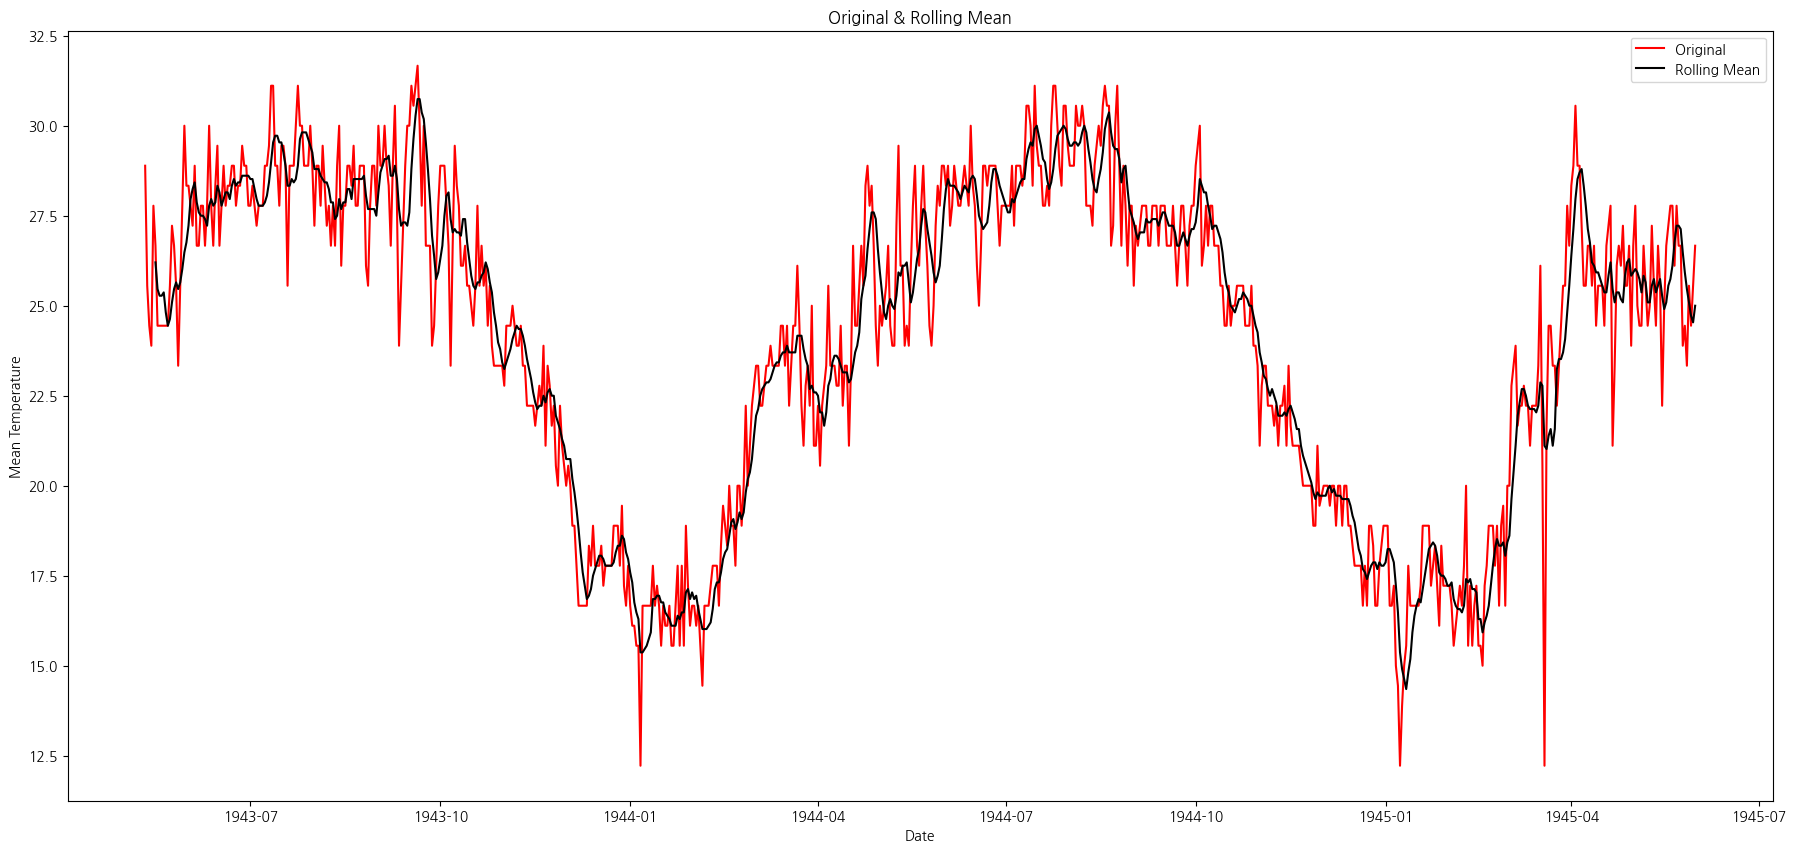

,MeanTemp
Date,
1943-05-11,NaN
1943-05-12,NaN
1943-05-13,NaN
1943-05-14,NaN
1943-05-15,NaN
...,...
1945-05-27,25.462963
1945-05-28,25.092593
1945-05-29,24.722222


In [77]:
ma_func(ts, 6)

# 차분을 통한 정상시계열 만들기
- 차분(diff) : 시계열의 차이만 계산해 비정상성을 정상성으로 변환
- 원값 - 이동평균(ma) : 이동평균을 사용하면 추세성분을 제거해 정상성으로 변환

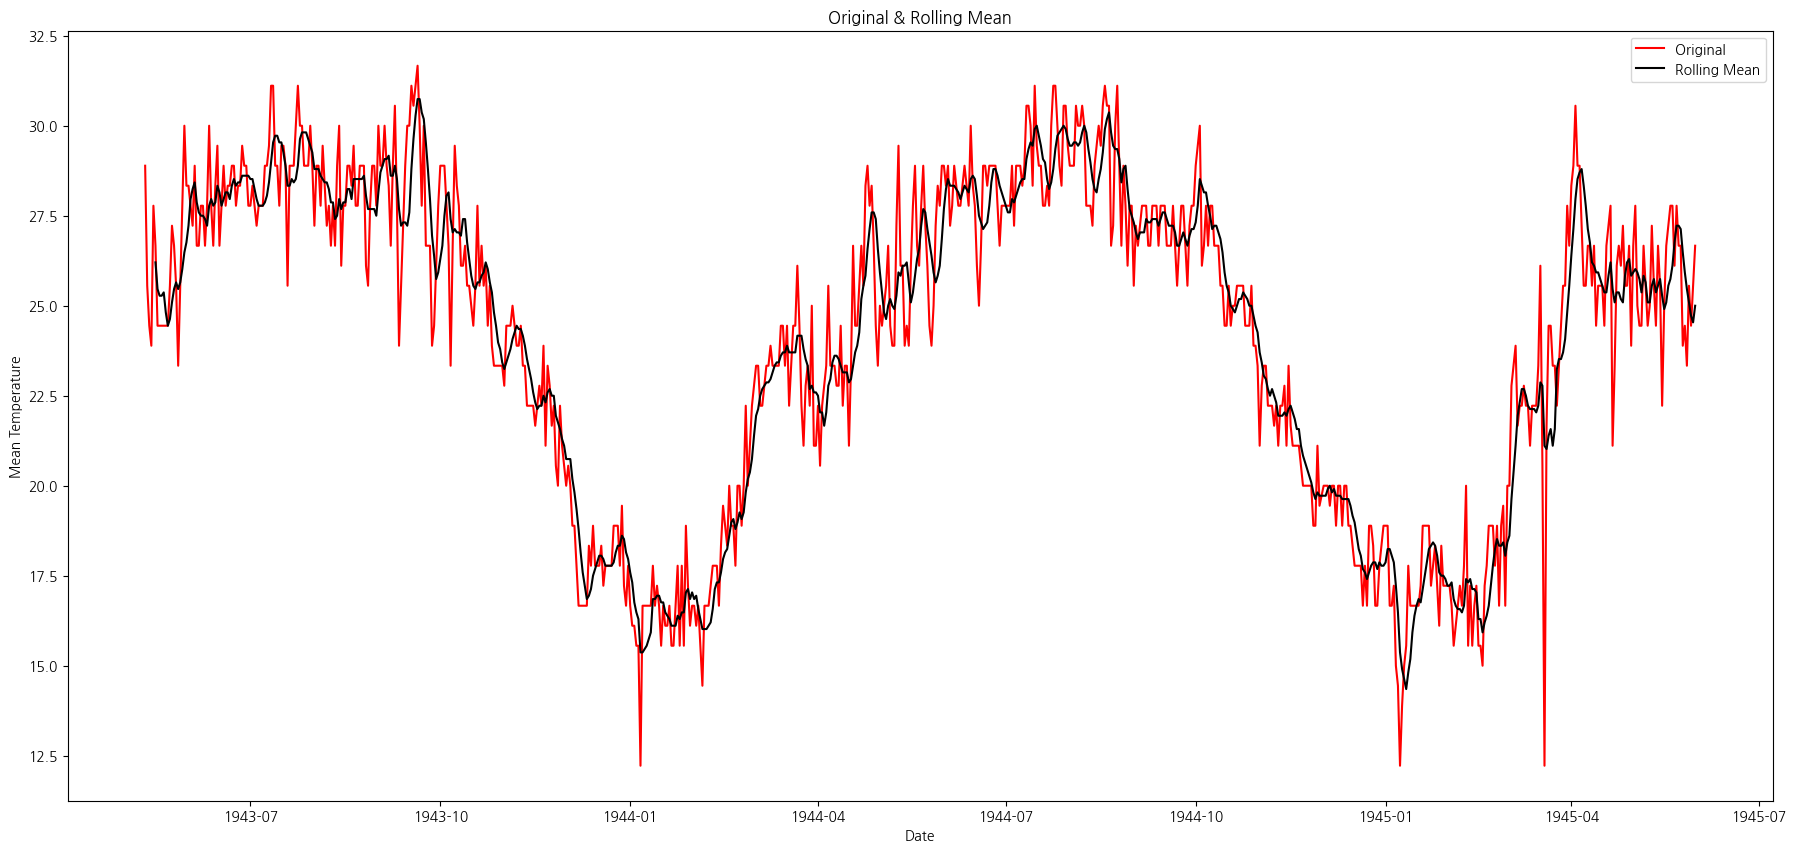

In [78]:
# ma를 이용한 정상화
window_size = 6
moving_avg = ma_func(ts, window_size)

In [80]:
# 원본데이터에서 ma 값을 뺀 거. 정상시계열로 변환될 것
ts_ma_diff = ts - moving_avg
ts_ma_diff

,MeanTemp
Date,
1943-05-11,NaN
1943-05-12,NaN
1943-05-13,NaN
1943-05-14,NaN
1943-05-15,NaN
...,...
1945-05-27,-2.129630
1945-05-28,0.462963
1945-05-29,-0.277778


In [81]:
ts_ma_diff = ts_ma_diff.dropna()
ts_ma_diff

,MeanTemp
Date,
1943-05-16,0.462963
1943-05-17,-1.018519
1943-05-18,-0.833333
1943-05-19,-0.833333
1943-05-20,-0.925926
...,...
1945-05-27,-2.129630
1945-05-28,0.462963
1945-05-29,-0.277778


In [82]:
check_adf(ts_ma_diff)

Test statistic :  -11.13851433513851
p-value :  3.1508685631640177e-20
Critical Values(임계값) : {'1%': -3.4392539652094154, '5%': -2.86546960465041, '10%': -2.5688625527782327}


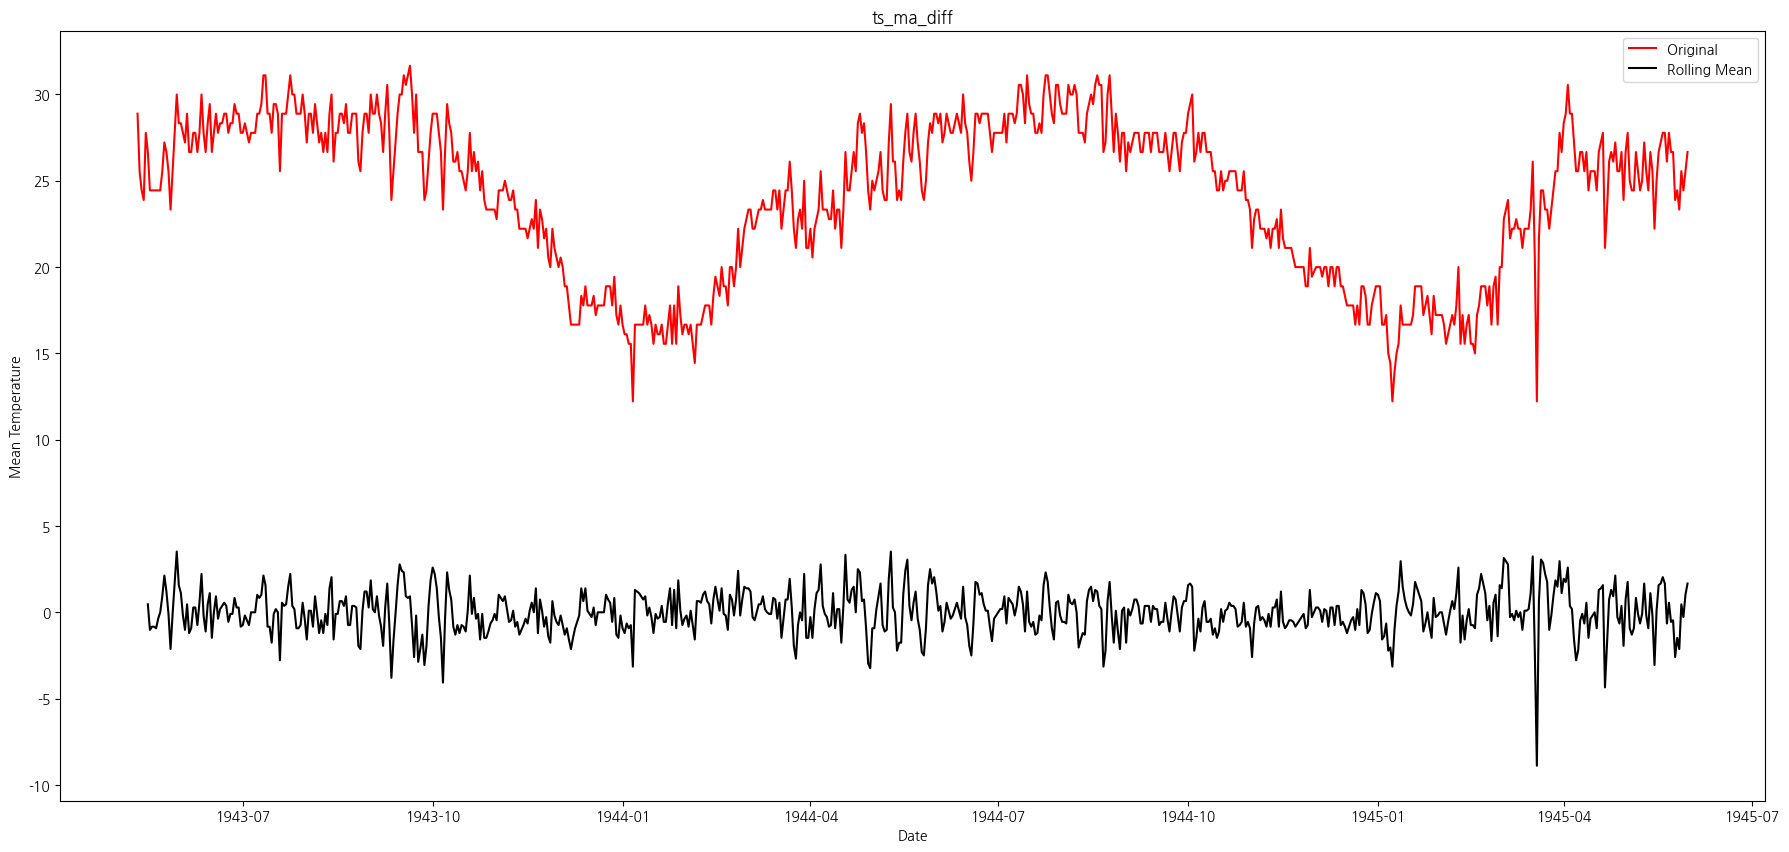

In [83]:
plt.figure(figsize = (22, 10))
origin = plt.plot(ts, color = 'red', label = 'Original')
mean = plt.plot(ts_ma_diff, color = 'black', label = 'Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('ts_ma_diff')
plt.legend()
plt.show()

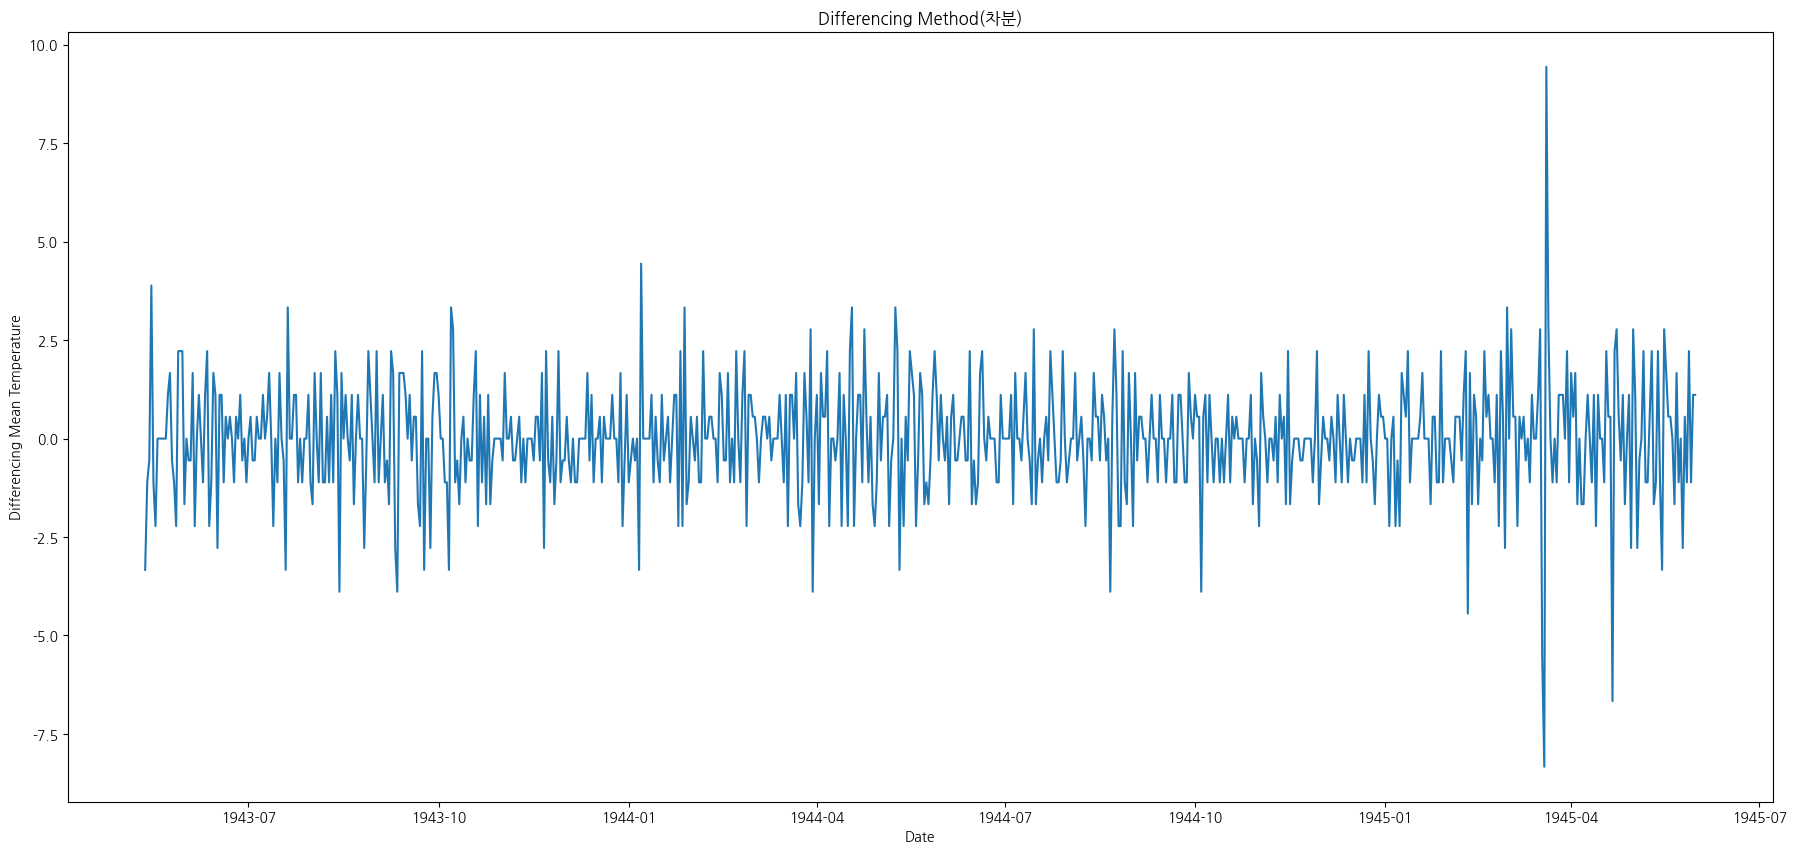

In [85]:
ts_diff = ts - ts.shift()
plt.figure(figsize = (22, 10))
plt.plot(ts_diff)
plt.title('Differencing Method(차분)')
plt.xlabel('Date')
plt.ylabel('Differencing Mean Temperature')
plt.show()

In [90]:
ts_diff = ts_diff.dropna()
ts_diff

,MeanTemp
Date,
1943-05-12,-3.333333
1943-05-13,-1.111111
1943-05-14,-0.555556
1943-05-15,3.888889
1943-05-16,-1.111111
...,...
1945-05-27,-1.111111
1945-05-28,2.222222
1945-05-29,-1.111111


## ARIMA 모델을 사용해 평년 기온 예측하기
- ARIMA(p, d, q) : d차 차분한 데이터에 AR(p)모형과 MA(q)모형을 합친 모형
- ARIMA 모형에서 I는 누적(integrated)을 의미
    - 비정상 시계열을 정상 시계열로 만들기 위해 필요한 차분의 횟수
- p, d, q 값은 ACF, PACF를 그려 확인해야 함

## ACF and PACF

In [84]:
from statsmodels.tsa.stattools import acf, pacf

In [92]:
lag_acf = acf(ts_diff, nlags = 20)
lag_pacf = pacf(ts_diff, nlags = 20, method = 'yw')

Text(0.5, 1.0, 'Patial Autocorrelation Function')

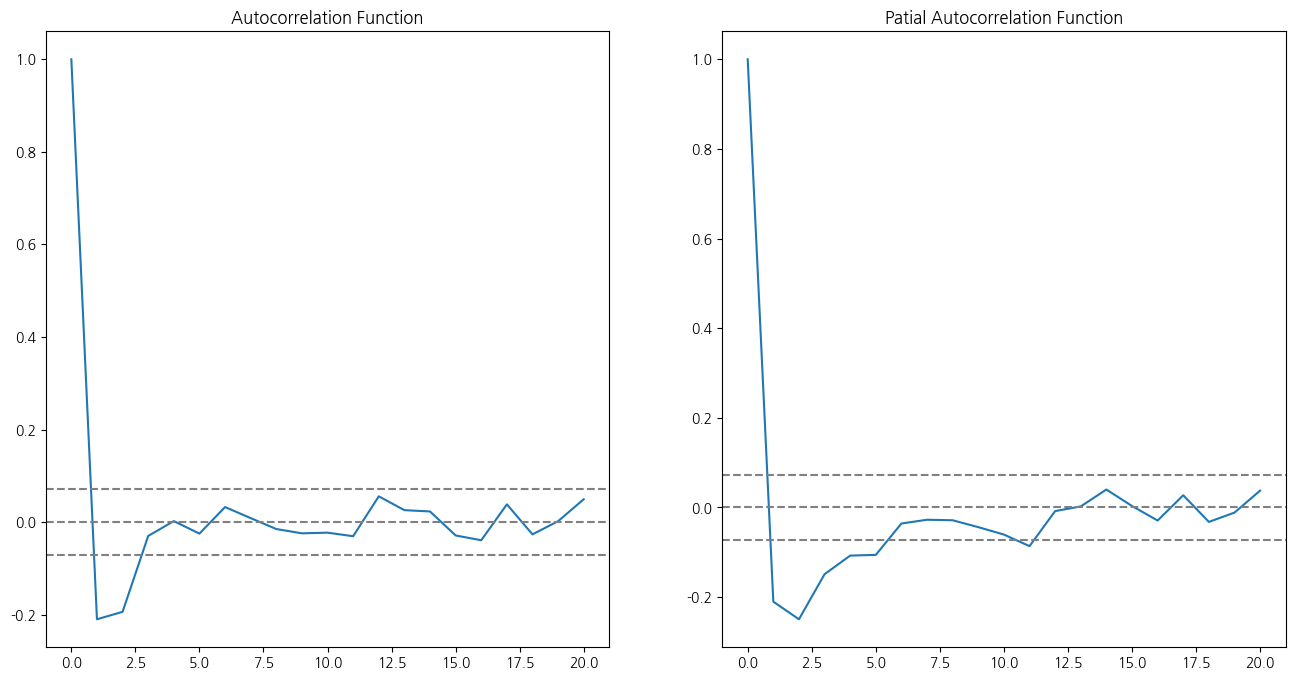

In [93]:
plt.figure(figsize = (16, 8))

# ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96 / np.sqrt(len(ts_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96 / np.sqrt(len(ts_diff)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96 / np.sqrt(len(ts_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96 / np.sqrt(len(ts_diff)), linestyle = '--', color = 'gray')
plt.title('Patial Autocorrelation Function')

### ACF, PACF 결과 해석
- 이들은 자기상관성을 보는 것.
- 3가지 선에서 가장 밑 선에 닿는 것 바로 직전 단계를 선택하면 됨
- p, d, q를 보기 위해 ACF, PACF를 보는 건데 p는 PACF의 값을 선택하고, q는 ACF의 값을 선택함
- 위 경우 p는 5, q는 2 다.

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [95]:
# ARIMA 모델 불러오기
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

In [96]:
# ARIMA 모델 피팅
model = ARIMA(ts, order = (1, 0, 1))
model_fit = model.fit()

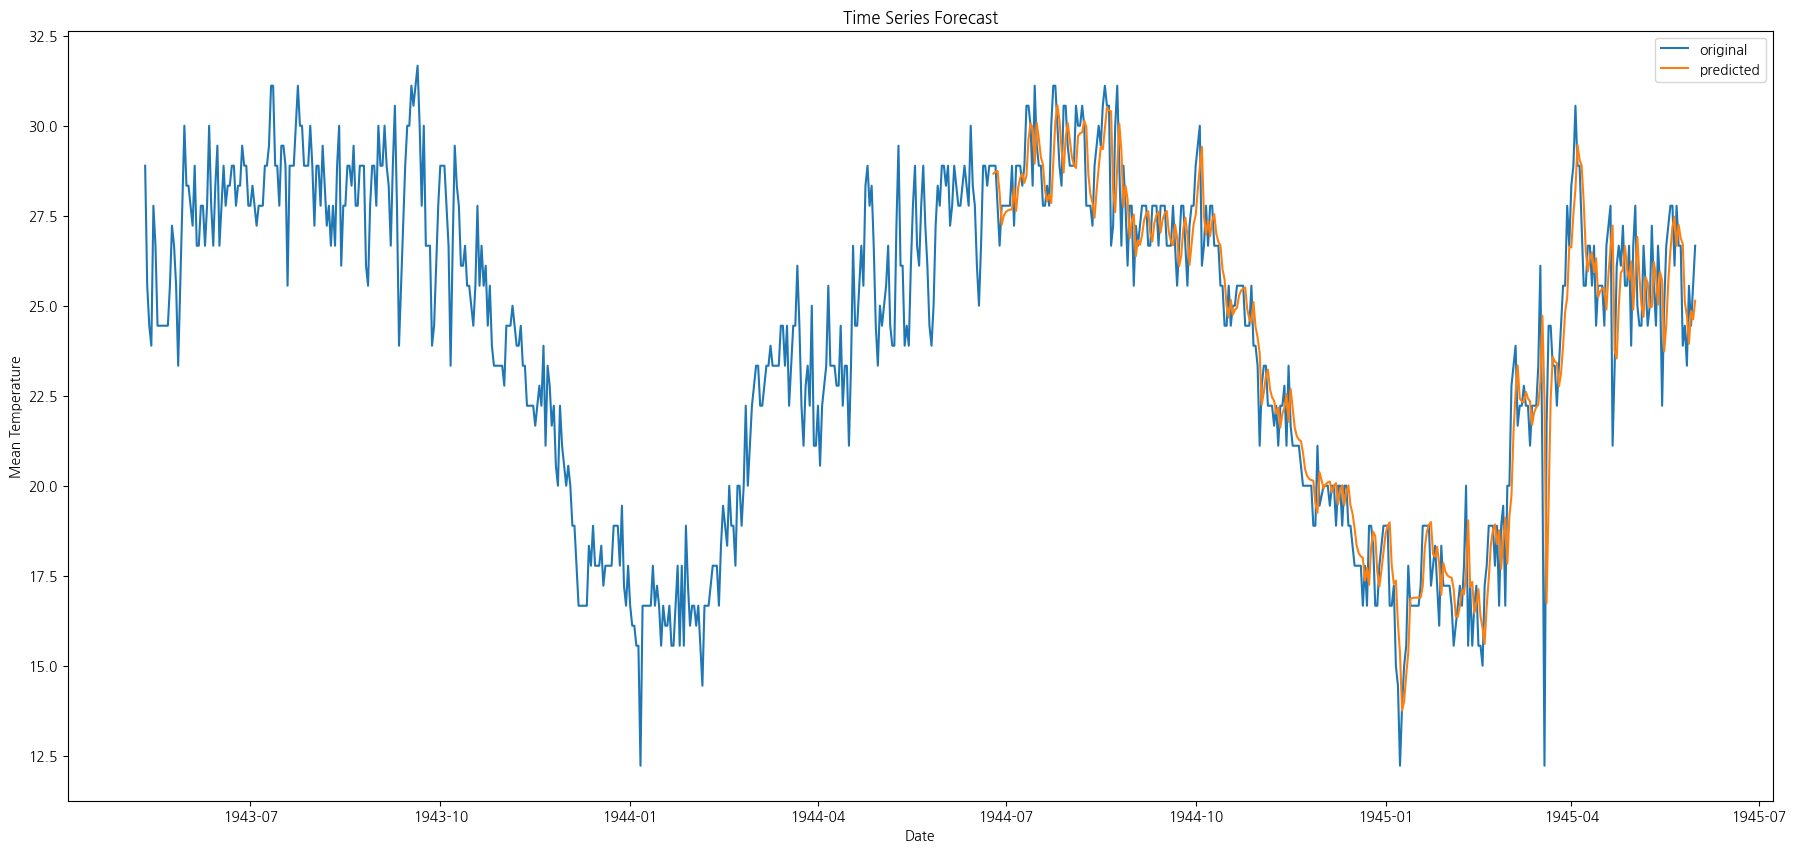

In [97]:
# predict
start_index = datetime(1944, 6, 25)
end_index = datetime(1945, 5, 31)
forecast = model_fit.predict(start = start_index, end = end_index)

# 시각화
plt.figure(figsize = (22, 10))
plt.plot(weather_bin['Date'], weather_bin['MeanTemp'], label = 'original')
plt.plot(forecast, label = 'predicted')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()

#### 전체 기간 예측 (원본)

In [101]:
# ARIMA 모델 피팅
model2 = ARIMA(ts, order = (1, 0, 1))
model2_fit = model2.fit()

mean_squared_error :  1.8625810286289943
mean_absolute_percentage_error :  0.044217489675445074


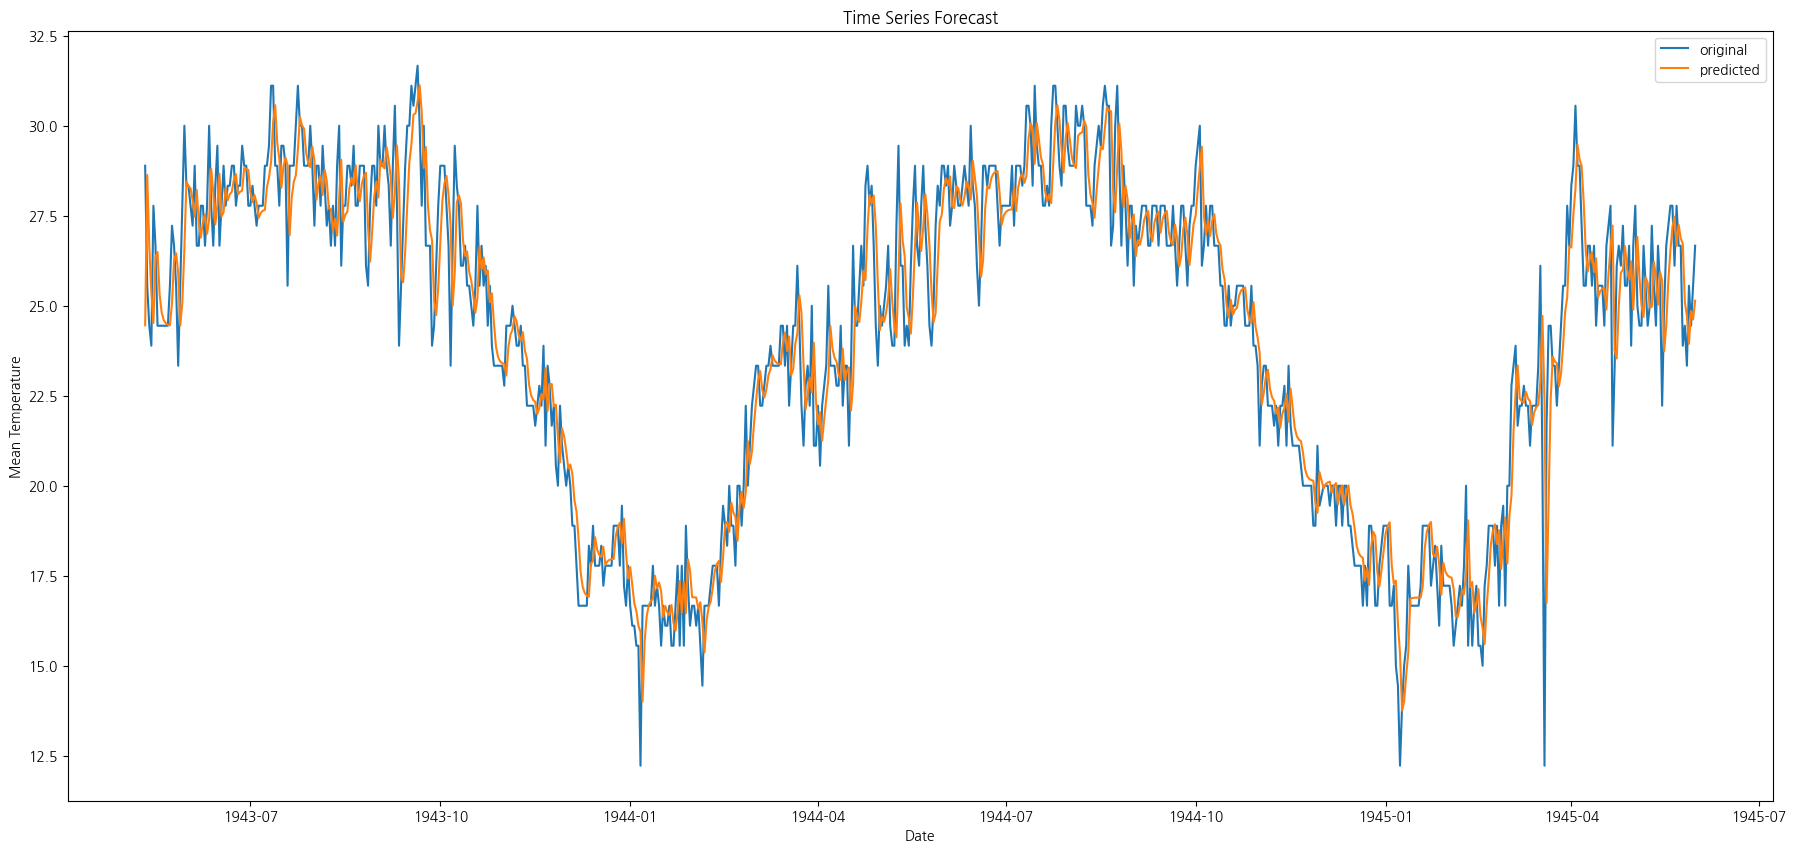

In [102]:
# predict
forecast2 = model2_fit.predict()

# MSE, MAPE 출력
error = mean_squared_error(ts, forecast2)
print('mean_squared_error : ', error)
mape = mean_absolute_percentage_error(ts, forecast2)
print('mean_absolute_percentage_error : ', mape)

# 시각화
plt.figure(figsize = (22, 10))
plt.plot(weather_bin['Date'], weather_bin['MeanTemp'], label = 'original')
plt.plot(forecast2, label = 'predicted')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()

### 전체 기간 예측2

mean_squared_error :  1.7446082029757033
mean_absolute_percentage_error :  0.04352562585237795


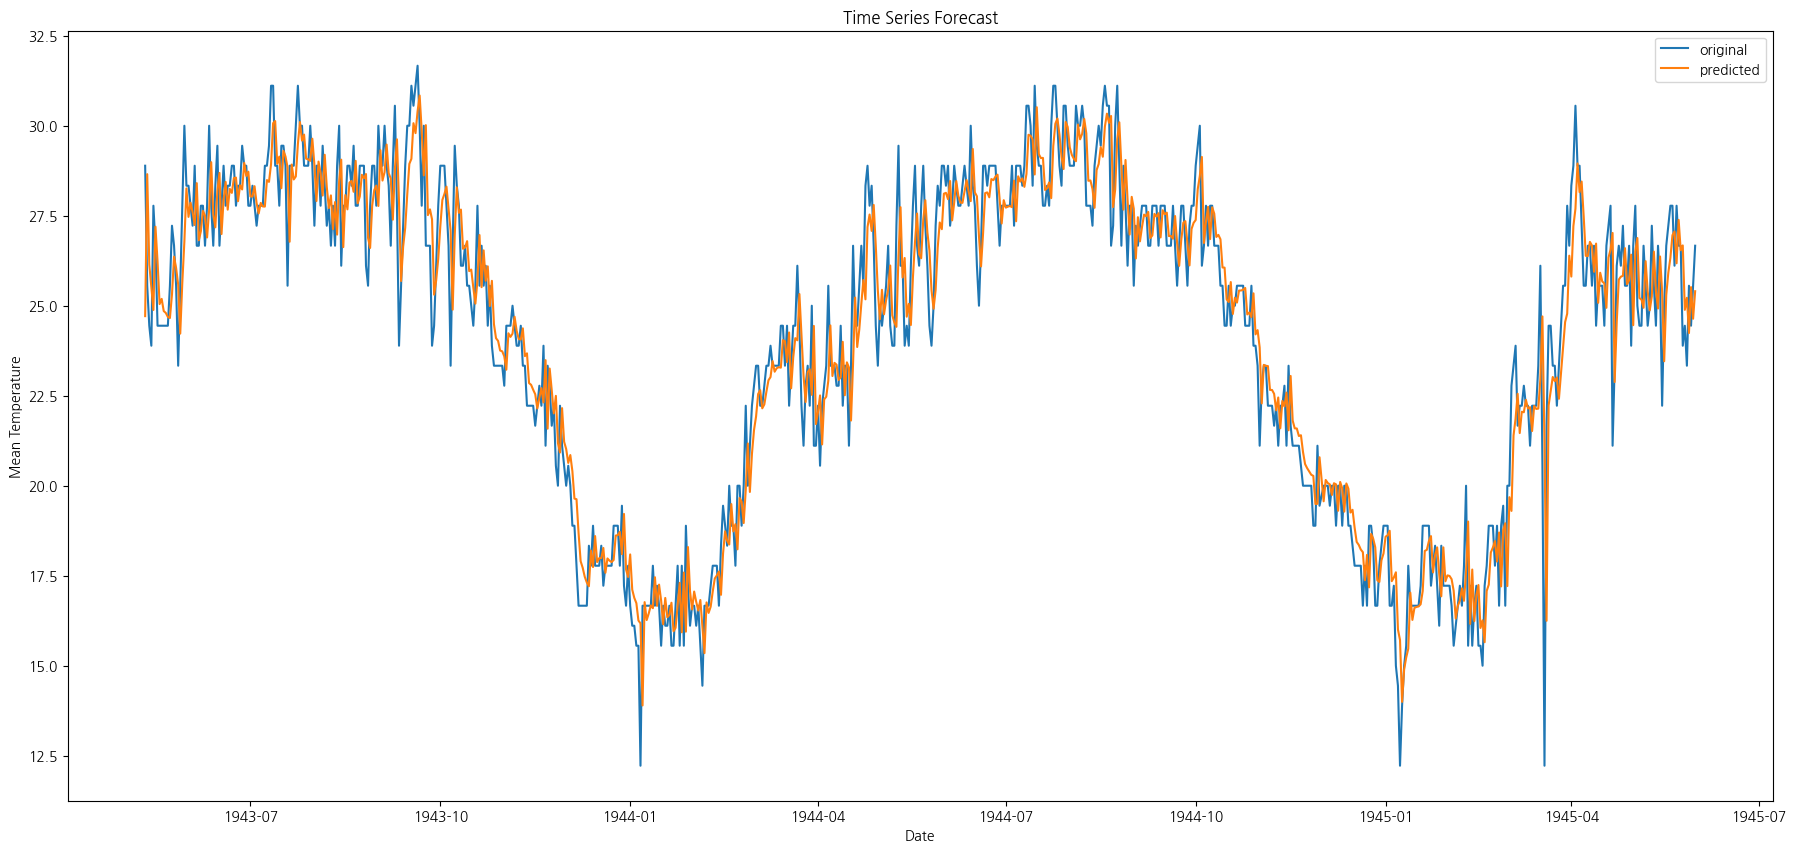

In [103]:
# ARIMA 모델 피팅
model3 = ARIMA(ts, order = (5, 0, 2))
model3_fit = model3.fit()

# predict
forecast3 = model3_fit.predict()

# MSE, MAPE 출력
error = mean_squared_error(ts, forecast3)
print('mean_squared_error : ', error)
mape = mean_absolute_percentage_error(ts, forecast3)
print('mean_absolute_percentage_error : ', mape)

# 시각화
plt.figure(figsize = (22, 10))
plt.plot(weather_bin['Date'], weather_bin['MeanTemp'], label = 'original')
plt.plot(forecast3, label = 'predicted')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()

### 미래 예측

mean_squared_error :  1.7446082029757033
mean_absolute_percentage_error :  0.04352562585237795


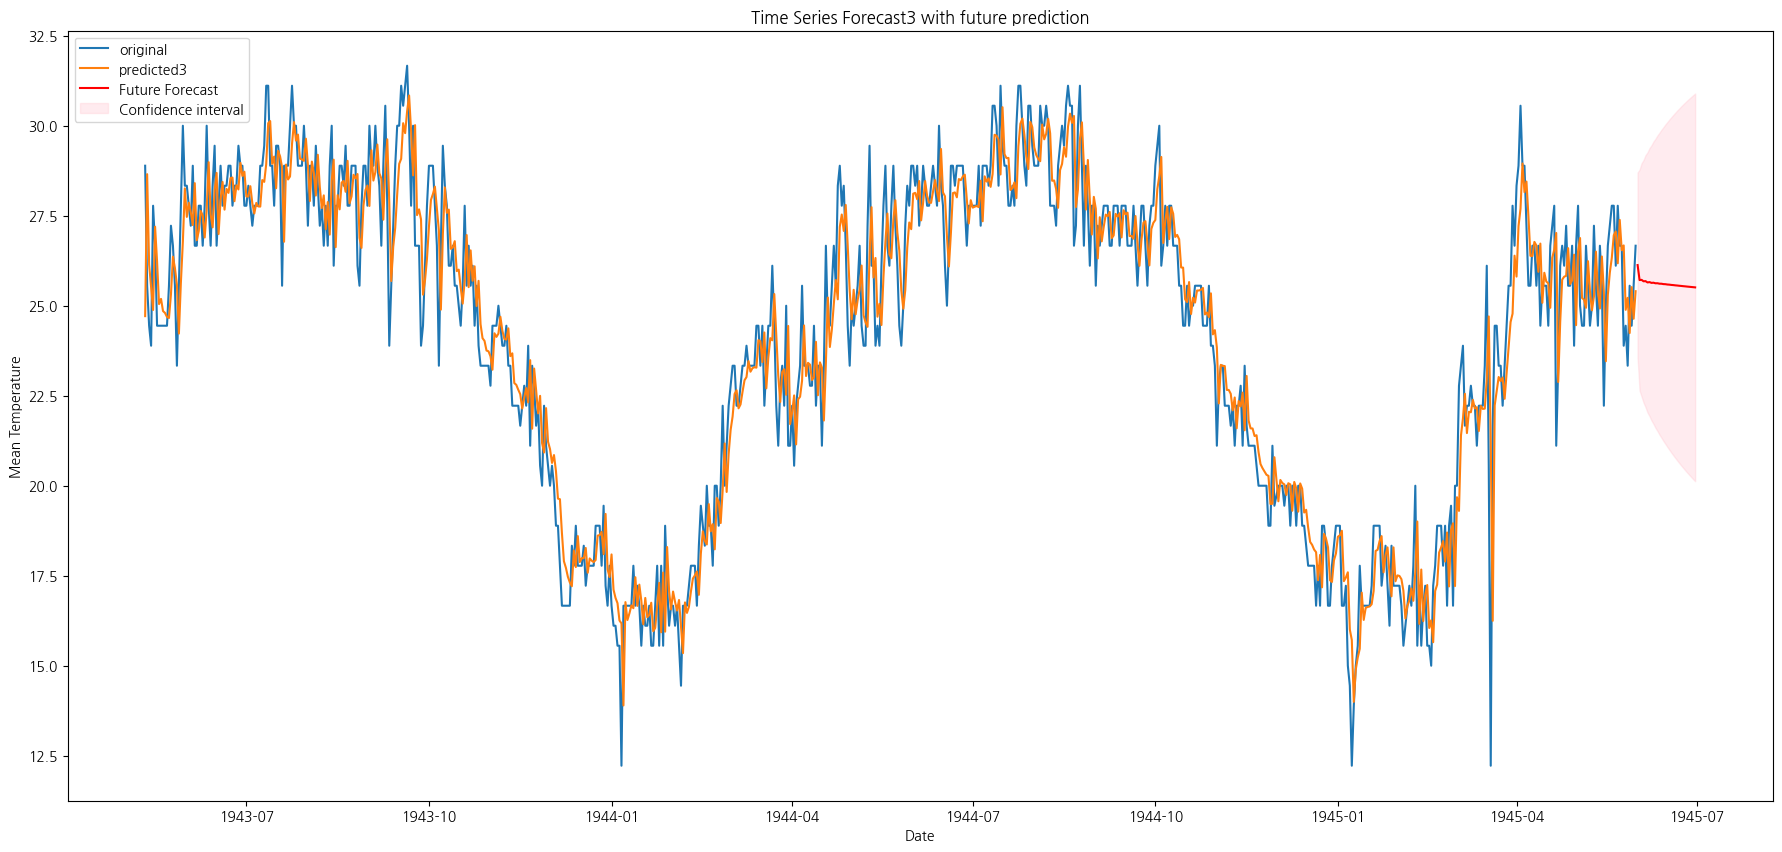

In [104]:
# ARIMA 모델 피팅
model3 = ARIMA(ts, order = (5, 0, 2))
model3_fit = model3.fit()

# predict 미래 기간 예측 (예 : 30일)
future_periods = 30
forecast3 = model3_fit.predict()
future_forecast = model3_fit.get_forecast(steps = future_periods)

# 예측값과 신뢰 구간을 분리
forecast_values = future_forecast.predicted_mean
conf_int = future_forecast.conf_int()

# MSE, MAPE 출력
error = mean_squared_error(ts, forecast3)
print('mean_squared_error : ', error)
mape = mean_absolute_percentage_error(ts, forecast3)
print('mean_absolute_percentage_error : ', mape)

# 시각화
plt.figure(figsize = (22, 10))
plt.plot(weather_bin['Date'], weather_bin['MeanTemp'], label = 'original')
plt.plot(forecast3, label = 'predicted3')
# 미래 예측 데이터 시각화
future_dates = pd.date_range(start = ts.index[-1], periods = future_periods + 1, freq = 'D')[1:] # 예측 날짜를 데이터 프레임에 추가
plt.plot(future_dates, forecast_values, label = 'Future Forecast', color = 'red')

# 신뢰 구간 시각화
plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color = 'pink', alpha = 0.3, label = 'Confidence interval')


plt.title('Time Series Forecast3 with future prediction')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()